<a href="https://colab.research.google.com/github/Zardian18/NLP_with_HuggingFace/blob/master/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install datasets

In [4]:
from datasets import list_datasets

all_datasets =list_datasets()

<ipython-input-4-4f107f98cf68>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets =list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
len(all_datasets)

115602

In [6]:
from datasets import load_dataset

emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [7]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotions["train"]

In [9]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
len(train_ds)

16000

In [11]:
train_ds.column_names

['text', 'label']

In [12]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [13]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [14]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df["label_name"]= df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


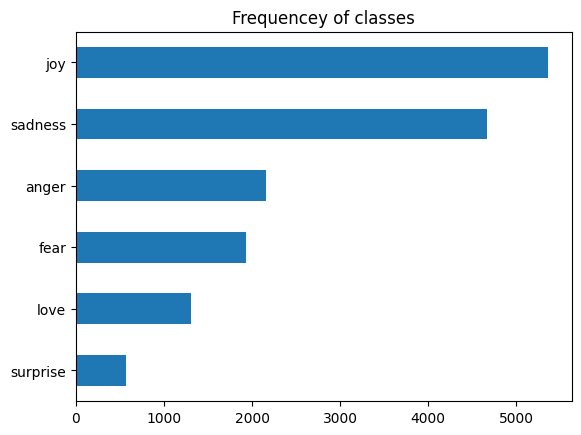

In [16]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequencey of classes")
plt.show();

In [17]:
df["Words Per Tweet"]= df["text"].str.split().apply(len)
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


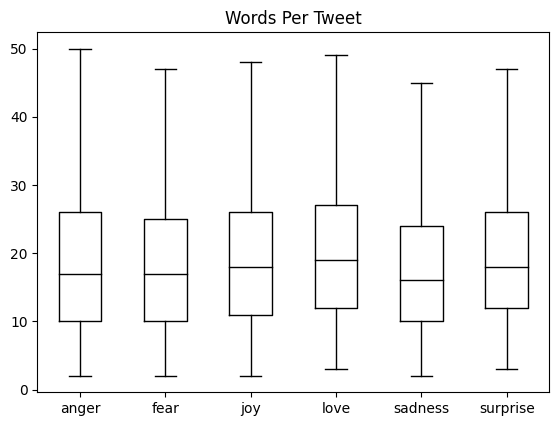

In [18]:
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [19]:
avg_len=0
for row in df["Words Per Tweet"]:
  avg_len+= row

avg_len= avg_len/len(df)
avg_len

19.1663125

In [20]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [21]:
emotions.reset_format()

In [22]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [23]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [24]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [25]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [26]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [27]:
len(token2idx)

20

In [28]:
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [29]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [30]:
for i in range(len(input_ids)):
  print(f"Token: {tokenized_text[i]}")
  print(f"Tensor index: {input_ids[i]}")
  print(f"One-hot: {one_hot_encodings[i]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Token: o
Tensor index: 14
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
Token: k
Tensor index: 12
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
Token: e
Tensor index: 8
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Token: n
Tensor index: 13
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
Token: i
Tensor index: 11
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
Token: z
Tensor index: 19
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
Token: i
Tensor index: 11
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
Token: n
Tensor index: 13
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
Token: g
Tensor index: 10
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [32]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [33]:
tokenizer("hello my name is harddik. WHat is this")

{'input_ids': [101, 7592, 2026, 2171, 2003, 2524, 4305, 2243, 1012, 2054, 2003, 2023, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [34]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [35]:
distilbert_tokenizer("hello my name is harddik. What is this")

{'input_ids': [101, 7592, 2026, 2171, 2003, 2524, 4305, 2243, 1012, 2054, 2003, 2023, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [36]:
tokens = tokenizer.convert_ids_to_tokens(tokenizer("hello my name is harddik. WHat is this").input_ids)

In [37]:
tokens

['[CLS]',
 'hello',
 'my',
 'name',
 'is',
 'hard',
 '##di',
 '##k',
 '.',
 'what',
 'is',
 'this',
 '[SEP]']

In [38]:
tokenizer.vocab_size

30522

In [39]:
def tokenize(batch):
 return tokenizer(batch["text"], padding=True, truncation=True)

In [40]:
tokenize(emotions["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [41]:
emotions["train"][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [42]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [43]:
emotions_encoded["train"][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0],
 'input_ids': [[101,
   1045,
   2134,
   2102,
   2514,
   26608,
   102,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [101,
   1045,
   2064,
   2175,
   2013,
   3110,
   2061,
   20625,
   2000,
   2061,
   9636,
   17772,
   2074,
   2013,
   2108,
   2105,
   2619,
   2040,
   14977,
   1998,
   2003,
   8300,
   102,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,


In [44]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [45]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [46]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [47]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [48]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [49]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
 outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [50]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [51]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [52]:
def extract_hidden_states(batch):
  inputs={k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [53]:
emotions_encoded.set_format("torch",
 columns=["input_ids", "attention_mask", "label"])


In [54]:
emotions_encoded["train"][:2]

{'label': tensor([0, 0]),
 'input_ids': tensor([[  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0],
         [  101,  1045,  2064,  2175,  2013,  3110,  2061, 20625,  2000,  2061,
           9636, 17772,  2074,  2013,  2108,  2105,  2619,  2040, 14977,  1998,
           2003,  8300,   102,     0,     0,     0,     0,     0,     0,     0,
              0,     

In [55]:
# @title
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [56]:
# @title
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [57]:
# @title
import numpy as np

In [58]:
# @title
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [59]:
!pip install umap-learn

In [60]:
# @title
import umap
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.170962,6.359236,0
1,-3.187975,5.816982,0
2,5.158630,2.898165,3
3,-2.469131,3.762318,2
4,-3.478666,3.819714,3


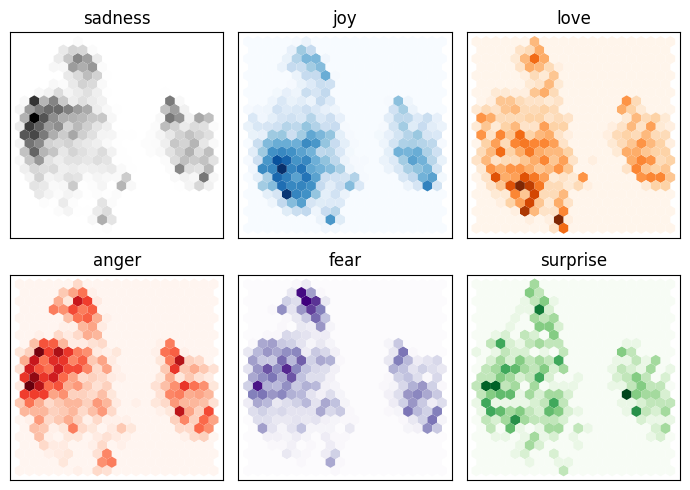

In [61]:
# @title
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
  gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])


plt.tight_layout()
plt.show()

In [62]:
df["label_name"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label_name, dtype: int64

In [63]:
X_train

array([[-0.1167513 ,  0.09857138, -0.12962897, ...,  0.0587108 ,
         0.35432693,  0.4042067 ],
       [-0.03236292, -0.03231524, -0.19572599, ..., -0.17465737,
         0.35463768,  0.30276582],
       [ 0.03974647,  0.2022336 ,  0.14227113, ..., -0.11406833,
         0.33937776,  0.395831  ],
       ...,
       [-0.00339847, -0.09585506,  0.05843544, ..., -0.04272703,
         0.2495916 ,  0.30761623],
       [ 0.06660261,  0.17334324,  0.12896673, ...,  0.06118569,
         0.29038215,  0.46844164],
       [ 0.01668789,  0.10127088, -0.00731721, ..., -0.06493651,
         0.34540522,  0.21993564]], dtype=float32)

In [64]:
y_train

array([0, 0, 3, ..., 1, 3, 0])

In [65]:
X_train.shape

(16000, 768)

In [62]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [63]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)


0.352

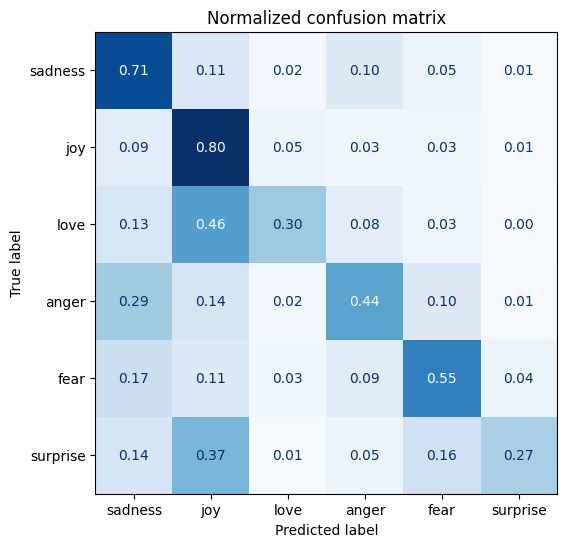

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [66]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification
 .from_pretrained(model_ckpt, num_labels=num_labels)
 .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
 labels = pred.label_ids
 preds = pred.predictions.argmax(-1)
 f1 = f1_score(labels, preds, average="weighted")
 acc = accuracy_score(labels, preds)
 return {"accuracy": acc, "f1": f1}


In [68]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# $huggingface-cli login

In [85]:
# ! pip install -U accelerate
# ! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.1
    Uninstalling transformers-4.38.1:
      Successfully uninstalled transformers-4.38.1


In [69]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.38.2', '0.27.2')

In [70]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [71]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)

In [72]:
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.859800,0.335850,0.903500,0.902394
2,0.267700,0.233675,0.920000,0.919847


In [73]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  inputs={k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
    reduction="none")
 # Place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}


In [74]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [75]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
 .apply(label_int2str))

In [76]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.494002
1801,i feel that he was being overshadowed by the s...,love,sadness,5.492626
1963,i called myself pro life and voted for perry w...,joy,sadness,5.333925
465,i would eventually go in to these stores but i...,joy,fear,5.295506
405,i have been feeling extraordinarily indecisive...,fear,joy,5.225936
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.129427
1950,i as representative of everything thats wrong ...,surprise,sadness,5.087316
1509,i guess this is a memoir so it feels like that...,joy,fear,5.009859
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.980412
1274,i am going to several holiday parties and i ca...,joy,sadness,4.928545


In [77]:
df_test.sort_values("loss", ascending=True).head(10)


,text,label,predicted_label,loss
604,i don t like to use the h word recklessly but ...,joy,joy,0.021552
1921,i feel the need to write i always want to writ...,joy,joy,0.021617
1263,i feel this way about blake lively,joy,joy,0.021883
578,i got to christmas feeling positive about the ...,joy,joy,0.022003
632,i feel he is an terrific really worth bet,joy,joy,0.022117
1780,ive explained that he is very creative and lov...,joy,joy,0.022149
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.022342
329,i have had my treasury selection on the front ...,joy,joy,0.022444
1050,i feel like our society has programmed little ...,joy,joy,0.022476
1513,i have also been getting back into my gym rout...,joy,joy,0.022478


In [78]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1709636698.22097da2af40.6787.0:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Zardian/distilbert-base-uncased-finetuned-emotion/commit/19e7c91873e5a2b3c79c72df6e35fcb794aafe02', commit_message='Training completed!', commit_description='', oid='19e7c91873e5a2b3c79c72df6e35fcb794aafe02', pr_url=None, pr_revision=None, pr_num=None)

In [79]:
from transformers import pipeline
# Change `transformersbook` to your Hub username
model_id = "Zardian/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [80]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


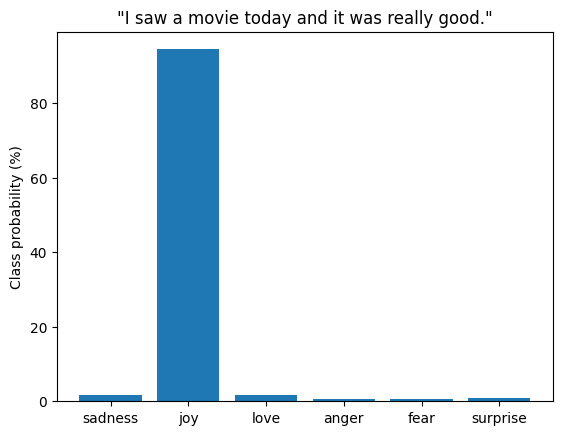

In [81]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [88]:
custom_tweet = "Woah wth, this game is so fucking epic!!!!"
preds = classifier(custom_tweet, return_all_scores=True)

In [89]:
preds

[[{'label': 'LABEL_0', 'score': 0.09641557931900024},
  {'label': 'LABEL_1', 'score': 0.17674630880355835},
  {'label': 'LABEL_2', 'score': 0.04736490547657013},
  {'label': 'LABEL_3', 'score': 0.6183154582977295},
  {'label': 'LABEL_4', 'score': 0.03635549545288086},
  {'label': 'LABEL_5', 'score': 0.024802345782518387}]]

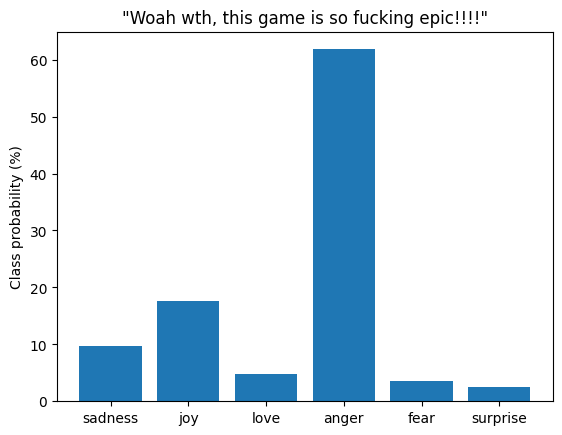

In [90]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


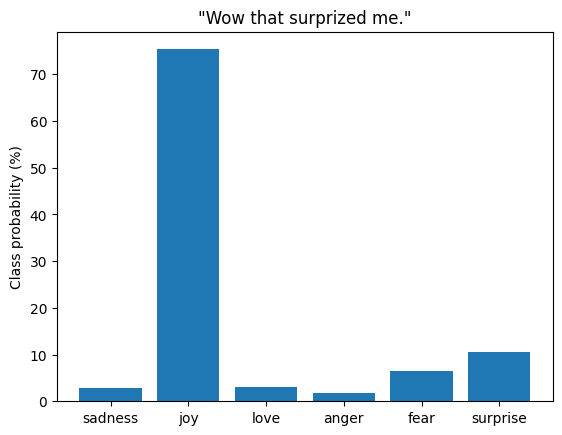

In [92]:
custom_tweet = "Wow that surprized me."
preds = classifier(custom_tweet, return_all_scores=True)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [ ]:
# @title
from transformers import TFAutoModelForSequenceClassification
tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

In [ ]:
# @title
tf_model.summary()

In [ ]:
# @title
# tf_model.compile(optimizer=)

In [ ]:
# @title
df

In [ ]:
# @title
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
 columns=tokenizer_columns, label_cols=["label"], shuffle=True,
 batch_size=batch_size)
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
 columns=tokenizer_columns, label_cols=["label"], shuffle=False,
 batch_size=batch_size)

In [ ]:
# @title
tf_train_dataset

In [ ]:
# @title
tf_eval_dataset

In [104]:
# @title
from keras.src.optimizers.adam import Adam

In [107]:
# @title
opt = Adam(learning_rate =5e-5)

In [ ]:
# @title
import tensorflow as tf
import keras
import keras_core

tf_model.compile(optimizer=keras.optimizers.Adam(), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics= tf.metrics.SparseCategoricalAccuracy())

In [114]:
# @title
import tensorflow as tf
import keras

tf_model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics= tf.metrics.SparseCategoricalAccuracy())

In [ ]:
# @title
tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)